## Case Study on Correlation and Regression
A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.
2. Build a regression model to predict the profit from the given data and 
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.
* Add1(in Thousands) 290
* Add2(in Thousands) 312
* Add3(in Thousands) 309
* Add4(in Thousands) 298
* Add5(in Thousands) 320

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
df.Date.nunique()

205

In [6]:
# Set date as index
df.set_index('Date',inplace =True)

## 1.First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

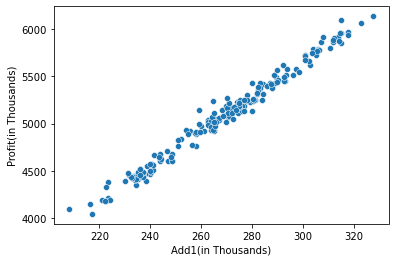

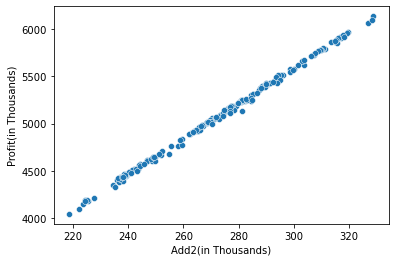

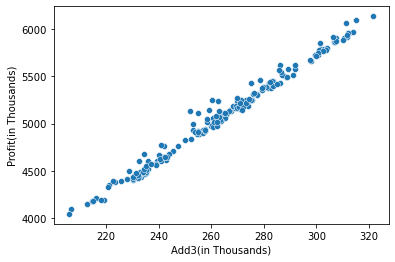

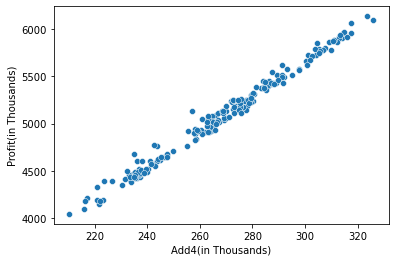

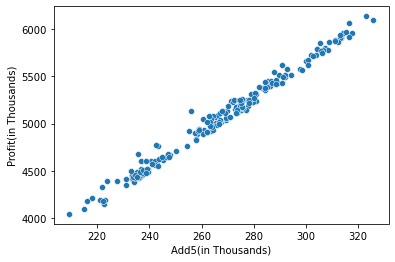

In [7]:
sel = df.drop(['Profit(in Thousands)'],axis =1).columns
for i in sel:
    plt.figure(i)
    sns.scatterplot(data = df, x = i, y = 'Profit(in Thousands)')

As per the data, there is linear relation between Profit and amount spent for advertising through five different companies.

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

### Regression Model using all Features.

In [8]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


<AxesSubplot:>

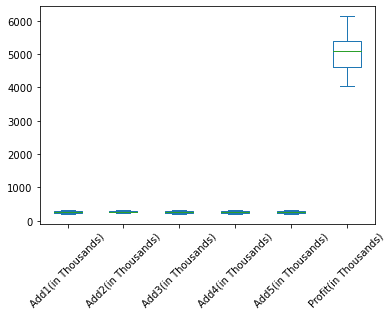

In [9]:
df.plot(kind ='box',rot = 45)

No outliers in the data.

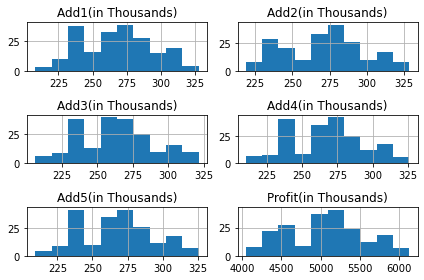

In [10]:
df.hist()
plt.tight_layout()
plt.show()

In [11]:
df.dtypes

Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

### Train Test Split

In [12]:
X = df.drop('Profit(in Thousands)',axis =1)
y = df['Profit(in Thousands)']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2,random_state =42 )

### Apply model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
print('mean_squared_error : ',mean_squared_error(ypred, y_test))
print(lr.score(X_train, y_train))

mean_squared_error :  4.236778747222825e-25
1.0


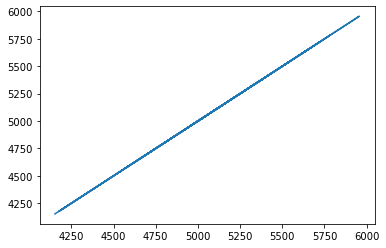

In [15]:
plt.plot( ypred, y_test)

### Regression Model using selected Features(using corelation)

<AxesSubplot:>

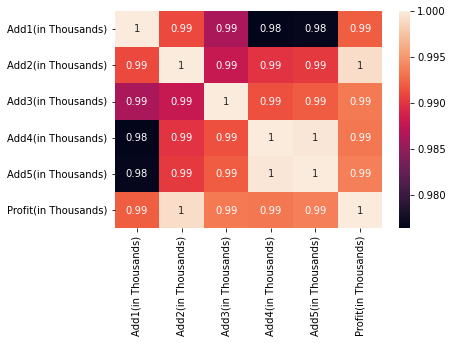

In [16]:
sns.heatmap(df.corr(),annot =True)

In [17]:
X1 = df[["Add2(in Thousands)","Add4(in Thousands)"]]
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = .2,random_state =42 )
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
ypred = lr1.predict(X_test)
print('mean_squared_error : ',mean_squared_error(ypred, y_test))
print(lr1.score(X_train, y_train))

mean_squared_error :  124.87936996170227
0.9991690195371579


### Conclusion
The model lr is perfectly fitting the data.Training error and test error is approx nil, when using whole features. The perfect fit can be due to the nature of data, as there is perfect linear relation with each independent feature and target feature.Though the features are highly inter corelated, feature reduction is not really improving the model.

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [18]:
#Convert the given add amounts into dataframe.
X = {"Add1(in Thousands)" : [290],"Add2(in Thousands)": [312] ,"Add3(in Thousands)": [309] ,"Add4(in Thousands)": [298],"Add5(in Thousands)": [320]}
X_test = pd.DataFrame(X)
X_test

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [19]:
lr.predict(X_test)

array([5820.06])

Profit generated for the given amount spend on advertisement is 5820.06.